# APLICACIONES DE CIENCIAS DE LA COMPUTACIÓN (INF265)
## (Primer Semestre 2023)

## Laboratorio 5: Algoritmos y Heurísticas de Búsqueda (Búsqueda con Información)

Indicaciones generales:

- Duración: **120 minutos (2 horas)**.
- **Las respuestas deben contar con un buen fundamento teórico.**
- Cualquier indicio de plagio resultará en la anulación de la prueba.
- Debe presentar sus respuestas en base a los resultados de ejecución en los casos que se solicite. <br>**No se calificarán aquellas respuestas que no presenten un resultado de ejecución o que no concuerden con este.**
- Subir el cuadernillo con el nombre **Lab5_código.ipynb**, donde código es su código PUCP de 8 dígitos.  
- Se tomará en cuenta en la calificación el uso de comentarios relevantes.

Objetivos:
- Especificar problemas como búsquedas en espacios de estados.
- Identificar correctamente utilidades, costos y objetivos en un problema de búsqueda.
- Comparar los diferentes métodos de búsqueda sin información y con información.
- Comprender, comparar y recomendar heurísticas en algoritmos de búsqueda con información.
- Plantear alternativas de modelos de búsqueda ante las diferentes dificultades que se puedan generar.
- Relacionar los conceptos aprendidos sobre problemas de búsqueda sin información con escenarios de la vida cotidiana.


### Clase Mapa
Estructura para almacenar informacion de un mapa. Tiene dos atributos: <b>neighbors</b> (diccionario que contiene las ciudades vecinas de cada ciudad y las distancias para llegar a ellas) y <b>location</b>, diccionario con las coordenadas X,Y de cada ciudad.

En el presente laboratorio se trabajará con el mapa de Romania, mostrado en la siguiente Figura

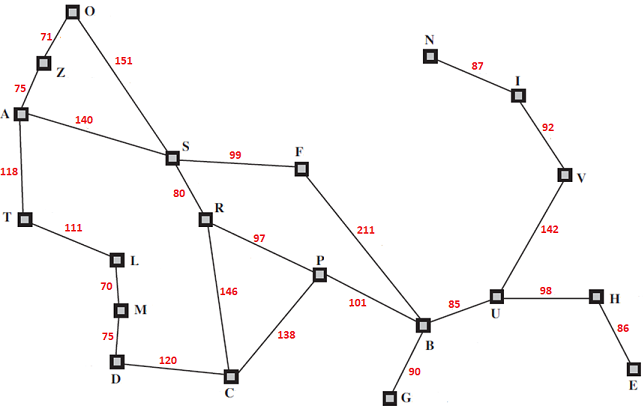

In [1]:
class Mapa:
    def __init__(self, neighbors, location):
        self.neighbors = neighbors
        self.location = location


Instancia el mapa especifico de Romania

In [2]:
neighbors = {
 'A': [('Z',75), ('T',118), ('S',140)],
 'B': [('F',211), ('P',101), ('G',90), ('U',85)],
 'C': [('D',120), ('R',146), ('P',138)],
 'D': [('M',75), ('C',120)],
 'E': [('H',86)],
 'F': [('S',99), ('B',211)],
 'G': [('B',90)],
 'H': [('U',98), ('E',86)],
 'I': [('N',87), ('V',92)],
 'L': [('T',111), ('M',70)],
 'M': [('L',70), ('D',75)],
 'N': [('I',87)],
 'O': [('Z',71), ('S',151)],
 'P': [('R',97), ('C',138), ('B',101)],
 'R': [('S',80), ('C',146), ('P',97)],
 'S': [('A',140), ('O',151), ('F',99), ('R',80)],
 'T': [('A',118), ('L',111)],
 'U': [('B',85), ('V',142), ('H',98)],
 'V': [('U',142), ('I',92)],
 'Z': [('O',71), ('A',75)]}

location = {
 'A': (91, 492),
 'B': (400, 327),
 'C': (253, 288),
 'D': (165, 299),
 'E': (562, 293),
 'F': (305, 449),
 'G': (375, 270),
 'H': (534, 350),
 'I': (473, 506),
 'L': (165, 379),
 'M': (168, 339),
 'N': (406, 537),
 'O': (131, 571),
 'P': (320, 368),
 'R': (233, 410),
 'S': (207, 457),
 'T': (94, 410),
 'U': (456, 350),
 'V': (509, 444),
 'Z': (108, 531)}

romania = Mapa(neighbors, location)


### Clase <b>SearchProblem</b>

Esta es una clase abstracta para definir problemas de busqueda. Se debe hacer subclases que implementen los metodos de las acciones, resultados, test de objetivo y el costo de camino. Entonces se puede instanciar las subclases y resolverlos con varias funciones de busqueda.

In [3]:
class SearchProblem(object):
    def __init__(self, initial, goal=None):
        """Este constructor especifica el estado inicial y posiblemente el estado(s) objetivo(s),
        La subclase puede añadir mas argumentos."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Retorna las acciones que pueden ser ejecutadas en el estado dado.
        El resultado es tipicamente una lista."""
        raise NotImplementedError

    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada en el estado state.
        La accion debe ser alguna de self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Retorna True si el estado pasado satisface el objetivo."""
        raise NotImplementedError

    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con 
        la accion action, asumiendo un costo c para llegar hasta state1. 
        El metodo por defecto cuesta 1 para cada paso en el camino."""
        return c + 1

    def value(self, state):
        """En problemas de optimizacion, cada estado tiene un valor. Algoritmos
        como Hill-climbing intentan maximizar este valor."""
        raise NotImplementedError

###  <b> Clase MapSearchProblem </b>  
Esta es una subclase de SearchProblem donde se define concretamente el problema de busqueda en mapa. El constructor recibe el estado inicial, objetivo y un mapa. 

In [4]:
class MapSearchProblem(SearchProblem):
    def __init__(self, initial, goal, mapa):
        """El constructor recibe  el estado inicial, el estado objetivo y un mapa (de clase Mapa)"""
        self.initial = initial
        self.goal = goal
        self.map = mapa

    def actions(self, state):
        """Retorna las acciones ejecutables desde ciudad state.
        El resultado es una lista de strings tipo 'goCity'. 
        Por ejemplo, en el mapa de Romania, las acciones desde A serian:
         ['goZ', 'goT', 'goS']"""
        neighbors = []
        acciones = []
        tupla = ()
        neighbors = self.map.neighbors[state]
        for acc in range(len(neighbors)):
            acciones.append('go' + neighbors[acc][0])
        return acciones

    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada desde ciudad state.
        La accion debe ser alguna de self.actions(state)
        Por ejemplo, en el mapa de Romania, el resultado de aplicar la accion 'goZ' 
        desde el estado 'A' seria 'Z'"""  
        newState = action[2]   #el ultimo caracter de la accion es el nombre de la ciudad destino
        return newState
        
    def goal_test(self, state):
        """Retorna True si state es self.goal"""
        return (self.goal == state) 

    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con la accion action 
        El costo del camino para llegar a state1 es c. El costo de la accion debe ser
        extraido de self.map."""
        actionCost = 0;
        destStates = self.map.neighbors[state1] #estado destino, state2
        for acc in range(len(destStates)):
            if (destStates[acc][0] == state2):
                actionCost = destStates[acc][1]
                break
        return c + actionCost;

### Clase <b>Node</b>

Estructura de datos para almacenar la informacion de un nodo en un <b>arbol de busqueda</b>. Contiene información del nodo padre y el estado que representa el nodo. Tambien incluye la accion que nos llevo al presente nodo y el costo total del camino desde el nodo raiz hasta este nodo.

In [5]:
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        "Crea un nodo de arbol de busqueda, derivado del nodo parent y accion action"
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def expand(self, problem):
        "Devuelve los nodos alcanzables en un paso a partir de este nodo."
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        next = problem.result(self.state, action)
        return Node(next, self, action,
                    problem.path_cost(self.path_cost, self.state, action, next))

    def solution(self):
        "Retorna la secuencia de acciones para ir de la raiz a este nodo."
        return [node.action for node in self.path()[1:]]

    def path(self):
        "Retorna una lista de nodos formando un camino de la raiz a este nodo."
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))
    
    def __eq__(self, other): 
        "Este metodo se ejecuta cuando se compara nodos. Devuelve True cuando los estados son iguales"
        "(representan el mismo estado)"
        return isinstance(other, Node) and self.state == other.state

### <b> Frontera tipo cola FIFO (first-in first out) para BFS</b> 

In [6]:
from collections import deque

class FIFOQueue(deque):
    """Una cola First-In-First-Out"""
    def pop(self):
        return self.popleft()

### <b> Frontera tipo cola de prioridad ordenada por una funcion de costo (para best_first_graph_search y A*)</b> 

In [7]:
import heapq
class FrontierPQ:
    "Una Frontera ordenada por una funcion de costo (Priority Queue)"
    
    def __init__(self, initial, costfn=lambda node: node.path_cost):
        "Inicializa la Frontera con un nodo inicial y una funcion de costo especificada" 
        "(por defecto es el costo de camino)."
        self.heap   = []
        self.states = {}
        self.costfn = costfn
        self.add(initial)
    
    def add(self, node):
        "Agrega un nodo a la frontera."
        cost = self.costfn(node)
        heapq.heappush(self.heap, (cost, node))
        self.states[node.state] = node
        
    def pop(self):
        "Remueve y retorna el nodo con minimo costo."
        (cost, node) = heapq.heappop(self.heap)
        self.states.pop(node.state, None) # remove state
        return node
    
    def replace(self, node):
        "node reemplaza al nodo de la Fontera que tiene el mismo estado que node."
        if node.state not in self:
            raise ValueError('{} no tiene nada que reemplazar'.format(node.state))
        for (i, (cost, old_node)) in enumerate(self.heap):
            if old_node.state == node.state:
                self.heap[i] = (self.costfn(node), node)
                heapq._siftdown(self.heap, 0, i)
                return

    def __contains__(self, state): return state in self.states
    
    def __len__(self): return len(self.heap)

### <b>Algoritmo general de búsqueda ciega con memoria de estados visitados (Graph Search)</b>

Algoritmo de general de busqueda ciega con memoria de estados visitados. El argumento frontier debe ser una cola vacia. Si la frontera es tipo FIFO hace busqueda en amplitud (BFS), si la frontera es una pila hará busqueda en profundidad (DFS)

In [8]:
def graph_search(problem, frontier):
    frontier.append(Node(problem.initial))
    explored = set()     # memoria de estados visitados
    expanded_nodes = 0   # contador de nodos expandidos
    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node, expanded_nodes
        explored.add(node.state)
        expanded_nodes = expanded_nodes + 1
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
    return None

### <b> Algoritmo de Busqueda por la mejor opción: Best-First-Graph-Search </b> 
Algoritmo general de busqueda con información. La frontera es una cola de prioridad ordenada por la funcion de evaluacion f 

In [9]:
def best_first_graph_search(problem, f):
    """Busca el objetivo expandiendo el nodo de la frontera con el menor valor de la funcion f. Memoriza estados visitados
    Antes de llamar a este algoritmo hay que especificar La funcion f(node). Si f es node.depth tenemos Busqueda en Amplitud; 
    si f es node.path_cost tenemos Busqueda  de Costo Uniforme. Si f es una heurística tenemos Busqueda Voraz;
    Si f es node.path_cost + heuristica(node) tenemos A* """

    frontier = FrontierPQ( Node(problem.initial), f )  # frontera tipo cola de prioridad ordenada por f
    explored = set()     # memoria de estados visitados
    expanded_nodes = 0   # contador de nodos expandidos
    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node, expanded_nodes
        explored.add(node.state)
        expanded_nodes = expanded_nodes + 1
        for action in problem.actions(node.state):
            child = node.child_node(problem, action)
            if child.state not in explored and child.state not in frontier:
                frontier.add(child)
            elif child.state in frontier:
                incumbent = frontier.states[child.state] 
                if f(child) < f(incumbent):
                    frontier.replace(child)

### <b> Algoritmo A* </b> 
A* es un caso especial de best_first_graph_search con f = path_cost + heuristic

In [10]:
def astar_search(problem, heuristic):
    f = lambda node: node.path_cost + heuristic(node, problem)
    return best_first_graph_search(problem, f)


In [11]:
def ucs_search(problem, heuristic):
    f = lambda node: node.path_cost
    return best_first_graph_search(problem, f)


### <b> Heurísticas para A* </b> 
Se debe implementar las heurísticas abajo para A* 

In [13]:
import math

def nullheuristic(node, problem):  # heurística nula (A* se convierte en busqueda de costo uniforme)
    return 0

def distance_x(node, problem):
    "Valor absoluto de la distancia en el eje X entre dos ciudades"
    (sx , sy) = problem.map.location[node.state]    #estado actual
    (gx , gy) = problem.map.location[problem.goal]   #estado objetivo

    return abs(sx - gx)

def distance_y(node, problem):
    "Valor absoluto de la distancia en el eje Y entre dos ciudades"
    (sx , sy) = problem.map.location[node.state]
    (gx , gy) = problem.map.location[problem.goal]

    return abs(sy - gy)

def square_dist(node, problem):
    "Suma de los cuadrados de distancias en eje X y eje Y entre dos ciudades"
    
    return math.pow(distance_x(node, problem) + distance_y(node, problem), 2)

def euclidean_dist(node, problem):
    "Distancia en linea recta entre dos ciudades"
    ## COMPLETAR
    (sx , sy) = problem.map.location[node.state]
    (gx , gy) = problem.map.location[problem.goal]
    return math.sqrt(math.pow(sx-gx,2)+math.pow(sy-gy,2))





def manhattan_dist(node, problem):
    "Distancia Manhattan (o city block) entre dos ciudades"
    ## COMPLETAR (DEBE USAR distance_x y distance_y)
    return distance_x(node,problem)+distance_y(node,problem)


def chebyshev_dist(node, problem):
    "Distancia de chebyshev (https://chris3606.github.io/GoRogue/articles/grid_components/measuring-distance.html#chebyshev-distance) entre dos ciudades"
    ## COMPLETAR (DEBE USAR distance_x y distance_y)
    
    #Se debe retornar la maxima distancia entre el eje x y el eje y
    return max(distance_x(node,problem),distance_y(node,problem))



def custom_dist(node, problem):
    "Es el valor máximo de evaluar square_dist, euclidean_dist, manhattan_dist y chebyshev_dist"
    ## COMPLETAR (DEBE USAR square_dist, euclidean_dist, manhattan_dist, chevyshev_dist y custom_dist)
        
    #Se debe retornar la maxima distancia entre square_dist, euclidean_dist, manhattan_dist, chevyshev_dist
    return max(chebyshev_dist(node,problem),max(manhattan_dist(node,problem),max(square_dist(node,problem),euclidean_dist(node,problem))))


### <b> Probando los algoritmos de Busqueda</b> 


In [15]:
p = MapSearchProblem('T', 'N', romania)   # problema de búsqueda

node, num_exp_nodes = graph_search(p, FIFOQueue())
print( 'Solucion obtenida con BFS: {}. Nodos expandidos = {}. Costo Solucion = {}'.format(node.solution(), num_exp_nodes, node.path_cost) )

node, num_exp_nodes = graph_search(p, [])
print( 'Solucion obtenida con DFS: {}. Nodos expandidos = {}. Costo Solucion = {}'.format(node.solution(), num_exp_nodes, node.path_cost) )

node, num_exp_nodes = astar_search(p, nullheuristic)
print( 'Solucion obtenida con A* y heuristica nula (UCS): {}. Nodos expandidos = {}. Costo Solucion = {}'.format(node.solution(), num_exp_nodes, node.path_cost) )

node, num_exp_nodes = astar_search(p, square_dist)
print( 'Solucion obtenida con A* y heuristica square_dist: {}. Nodos expandidos = {}. Costo Solucion = {}'.format(node.solution(), num_exp_nodes, node.path_cost) )

node, num_exp_nodes = astar_search(p, euclidean_dist)
print( 'Solucion obtenida con A* y heuristica euclidean_dist: {}. Nodos expandidos = {}. Costo Solucion = {}'.format(node.solution(), num_exp_nodes, node.path_cost) )

node, num_exp_nodes = astar_search(p, manhattan_dist)
print( 'Solucion obtenida con A* y heuristica manhattan_dist: {}. Nodos expandidos = {}. Costo Solucion = {}'.format(node.solution(), num_exp_nodes, node.path_cost) )

node, num_exp_nodes = astar_search(p, chebyshev_dist)
print( 'Solucion obtenida con A* y heuristica chebyshev_dist: {}. Nodos expandidos = {}. Costo Solucion = {}'.format(node.solution(), num_exp_nodes, node.path_cost) )

node, num_exp_nodes = astar_search(p, custom_dist)
print( 'Solucion obtenida con A* y heuristica custom_dist: {}. Nodos expandidos = {}. Costo Solucion = {}'.format(node.solution(), num_exp_nodes, node.path_cost) )


Solucion obtenida con BFS: ['goA', 'goS', 'goF', 'goB', 'goU', 'goV', 'goI', 'goN']. Nodos expandidos = 19. Costo Solucion = 974
Solucion obtenida con DFS: ['goL', 'goM', 'goD', 'goC', 'goP', 'goB', 'goU', 'goV', 'goI', 'goN']. Nodos expandidos = 12. Costo Solucion = 1021
Solucion obtenida con A* y heuristica nula (UCS): ['goA', 'goS', 'goR', 'goP', 'goB', 'goU', 'goV', 'goI', 'goN']. Nodos expandidos = 19. Costo Solucion = 942
Solucion obtenida con A* y heuristica square_dist: ['goA', 'goS', 'goF', 'goB', 'goU', 'goV', 'goI', 'goN']. Nodos expandidos = 8. Costo Solucion = 974
Solucion obtenida con A* y heuristica euclidean_dist: ['goA', 'goS', 'goR', 'goP', 'goB', 'goU', 'goV', 'goI', 'goN']. Nodos expandidos = 17. Costo Solucion = 942
Solucion obtenida con A* y heuristica manhattan_dist: ['goA', 'goS', 'goR', 'goP', 'goB', 'goU', 'goV', 'goI', 'goN']. Nodos expandidos = 17. Costo Solucion = 942
Solucion obtenida con A* y heuristica chebyshev_dist: ['goA', 'goS', 'goR', 'goP', 'goB', 

## **Preguntas**


<b>1) Completar el código faltante (Heurísticas) y probar el código.</b> (4 ptos)

<b>2) En cuanto a los resultados obtenidos
- ¿Los algoritmos BFS o DFS garantizan encontrar soluciones óptimas? Explique.</b>  (4 ptos)



<b>3) En cuanto a las soluciones encontradas por A*
- ¿Qué propiedades tiene que tener la heurística para garantizar soluciones óptimas?
- ¿Las heurísticas planteadas para el laboratorio tienen esas propiedades?</b> Explique. (4 ptos)


<b>4) Responder
- ¿A que heurística equivale custom_dist?, ¿a qué se debe esto?
- Ordene las heurísticas de la más dominante a la más dominada (square_dist, euclidean_dist, manhattan_dist, chevyshev_dist y custom_dist)?. Explique</b> (4 ptos) 


<b>5) Describa las área de las zonas visitadas por UCS y A* con cada una de las heurísticas (square_dist, euclidean_dist, manhattan_dist, chevyshev_dist y custom_dist) y relacionelas con sus características de dominancia y optimalidad.Explique. </b> (4 ptos)

 



2- El algoritmo bfs no garantiza soluciones optimas si el costo de camino no es una constante, cosa que no se da en el problema ya que las distancias para llegar de una ciudad a otra son muy diferentes, de modo que no es un algoritmo óptimo para este caso.

El algoritmo dfs no garantiza soluciones optimas, puesto que toma la primera solución que se encuentre, la cual puede no ser la más óptima. Por ejemplo, podría recorrer un camino más profundo hacia la ciudad destino y quedarse con esa solución, pero al lado podría haber otra que sea más óptima pero, debido a que el algoritmo prioriza la profundidad, jamás la encontraría.

3- Para que una heuristica sea óptima, deben cumplirse 2 propiedades:
- Que sea admisible
- Que sea consistente o monotónica

La heuristica de square_dist no sería óptima, puesto que no es consistente debido a que el cuadrado de la distancia x y la distancia y es más grande que la distancia x e y juntas, incumpliendo la desigualdad triangular.

La heuristica euclidean_dist es óptima, debido a que la distancia obtenida de obtener la distancia en linea recta del nodo hacia la meta es menor al costo real que involucraria moverse una distancia x y una distancia y a la meta y, al ser menor que la distancia x e y, también consistente.

La heuristica manhattan_dist es óptima, debido a que la distancia obtenida de sumar las distancias x e y es igual al costo real (es decir, moverse una distancia x e y hasta la meta) de llegar a la meta. Además, no supera a la distancia x e y sumadas, por lo que también es consistente.

La heuristica chebyshev es óptima, debido a que retorna el máximo entre las distnacias x e y, lo cual es menor al costo real ya mencionado y a la vez, de modo que es admisible, también es menor que la suma de las distancias x e y al ser solo una de las dos, por lo que es consistente también.

La heuristica custom_dist no es óptima, ya que al tomar la heuristica con mayor valor, toma la heuristica square_dist, la cual, como se menciono, no es óptima, por lo que custom_dist no será óptima tampoco.

4 -

Debido a que custom_dist toma la mayor distancia de las heuristicas dadas, la heuristica a la que toma es square_dist, al ser esta el cuadrado de la suma de la distancia x e y. 

A medida que una heuristica es más dominante, el resultado que devuelve es más grande y, al poder explorar nodos más próximos al objetivo, explora menor cantidad de nodos para llegar a la meta.

Las heuristicas más dominantes, entonces, serían la square_dist y la custom_dist, ya que la primera brinda un valor más grande y, como se observa en los resultados, explora una cantidad considerablemente menor de nodos que las otras heuristicas. La segunda, al tomar el máximo, es una heuristica igual de dominante que la más dominante.

Luego estaría la heuristica manhattan, ya que devuelve como h(n) la suma de las distancias x e y, lo cual es menor a la suma de cuadrados de square_dist. Además, como se aprecia en los resultados, tiene la 2da menor cantidad de nodos explorados.

Luego estaría la heuristica euclidean_dist, ya que, si bien explora igual cantidad de nodos que la manhattan, devuelve un resultado menor, pues la distancia recta entre x e y siempre es menor a la suma de las distancias x e y.

Por último, esta la heuristica chebyshev, la cual, al ser solo uno de x e y, es menor que la distancia recta de x a y, de modo que es menos dominante y expande más nodos como se puede ver en los resultados.

En conclusión, de mayor a menor en cuanto a dominancia: square_dist,custom_dist,manhattan_dist,euclidean_dist,chebyshev_dist.

5- 

La UCS, al no tener ninguna heuristica asociada, solamente buscará el camino que tenga el menor costo. Las zonas exploradas serán como círculos, puesto que no hay ninguna heuristica que la oriente para el objetivo. Esto se produce debido a que la heuristica seria h(n) = 0, de modo que su dominancia sería mínima y, por tanto, explora la mayor cantidad de nodos. Al explorar una mayor cantidad de nodos, se puede dar la optimalidad, ya que el costo de paso es mayor a 0.

La square_dist, al tener la heuristica dominante, las zonas que explora serán como elipses bastante orientadas hacia la meta debido a que el resultado de h(n) es el mayor de las heurísticas. Sin embargo, no es óptima debido a que no es consistente. Esto puede verse en las zonas, ya que si bien la zona explorada está más orientada a la meta, ello evita que encuentre nodos que podrían dar un mejor camino y, por tanto, una mejor solución.

Custom_dist, al tomar a square_dist como máximo, tendria la misma situación que square_dist.

La manhattan_dist tiene zonas que, al tener una heuristica lo más cercana a la realidad posible con la suma de la distancia x e y, explora zonas en forma de elipse  Al ser la segunda heuristica más dominante, las elipses que están bastante orientadas hacia la meta, pero no tanto como el caso de square_dist, de modo que explora una cantidad de nodos menor a UCS. Sin embargo, en este caso la heuristica es óptima, lo que se traduce a que las zonas exploradas incluirán los nodos que permitan encontrar el camino con menor costo a la meta.


La euclidean_dist tiene zonas que, al tener una heuristica de la linea recta entre el nodo y la meta, explora zonas en forma de elipse un tanto menos orientadas a la meta, esto debido a que tiene una menor dominancia que manhattan dist.  Debido a que también es óptima, las zonas elipticas exploradas permiten encontrar los nodos que lleven al mejor camino.

La chebyshev_dist explora los nodos con una zona eliptica, pues tiene una heuristica que lo orienta al objetivo. Al ser la menos dominante entre las heuristicas, esta orientación a la meta es menor, de modo que toma más exploración de nodos encontrar la solución óptima. Sin embargo, debido a que la heuristica es óptima, la orientación un tanto menor igual permite encontrar los nodos necesarios para la solución óptima de manera más rápida que UCS.



